The goal of this analysis is to seperate the individual effects of each adjuvant component (M, S vs L, and Q) at affecting an particular immune response (so instead of just looking at each adjuvant as a whole, we can look at the effect of each individual adjuvant component)

In [30]:
#IMPORT STATEMENTS
import pandas as pd
import matplotlib.pyplot as plt

I created a dummy dataframe with data I made up (but we can use the data you shared in your presentation like %CD69+ cells, memory cells, etc.).

To pre-process, I break up each adjuvant into a three binary variables, corresponding to whether the adjuvant has the M, L vs S, or Q components (for example LMQ is [1,1,1], LQ is [0,1,1], and the OVA peptide only is [0,0,0]

In [15]:
#LOAD AND FORMAT DATAFRAME

df = pd.read_excel('LogReg_TESTDATA.xlsx')
df = df.rename({'Unnamed: 0': 'Adjuvant'}, axis = 1)
m_vals = []
ls_vals = []
q_vals = []
for ii in range(df.shape[0]):
    val = df['Adjuvant'][ii]
    if 'M' in val:
        m_vals.append(1)
    else:
        m_vals.append(0)
    if 'L' in val:
        ls_vals.append(1)
    else:
        ls_vals.append(0)
    if 'Q' in val:
        q_vals.append(1)
    else:
        q_vals.append(0)
df['M'] = m_vals
df['L vs S'] = ls_vals
df['Q'] = q_vals

df = df.melt(id_vars = ['Adjuvant', 'M', 'L vs S', 'Q'], value_vars = [1,2,3,4,5], var_name = 'Replicate', value_name = "Immune Marker")
df

,Adjuvant,M,L vs S,Q,Replicate,Immune Marker
0,LMQ,1,1,1,1,50.0
1,SMQ,1,0,1,1,40.0
2,LQ,0,1,1,1,10.0
3,SQ,0,0,1,1,5.0
4,OVA,0,0,0,1,1.0
5,LMQ,1,1,1,2,55.0
6,SMQ,1,0,1,2,42.0
7,LQ,0,1,1,2,23.0
8,SQ,0,0,1,2,5.0
9,OVA,0,0,0,2,1.0


# Multiple Regression example

In [16]:
from sklearn.linear_model import LinearRegression

In [43]:
x = df.iloc[:, 1:4].values
y = df['Immune Marker'].values


#multiple linear regression
LR = LinearRegression()
LR.fit(x, y)
y_prediction =  LR.predict(x)


Text(0.5, 0, 'Experimental Values')

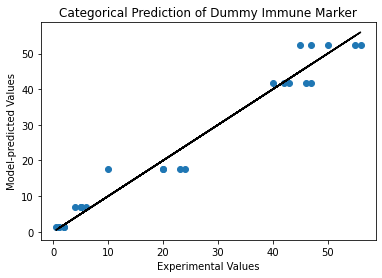

In [39]:
plt.scatter(y, y_prediction)
plt.plot(y,y, 'k')
plt.title('Categorical Prediction of Dummy Immune Marker')
plt.ylabel('Model-predicted Values')
plt.xlabel('Experimental Values')

Text(0.5, 1.0, 'Individual Importance of Each Modification')

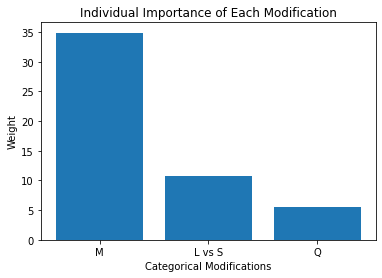

In [41]:
parameters = ['M', 'L vs S', 'Q']
loadings = LR.coef_

plt.bar(parameters, loadings)
plt.xlabel('Categorical Modifications')
plt.ylabel('Weight')
plt.title('Individual Importance of Each Modification')

The line fits well, indicating that the categorical linear regression is a good model. The weights indicate the relative contribution of each part of the adjuvant. In this example, the incorporation of M has the greatest effect on driving up the overall immune response.